In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

import plotly.graph_objects as go
from plotly.subplots import make_subplots


(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000, 28, 28, 1).astype('float32') / 255
X_test  = X_test.reshape (10000, 28, 28, 1).astype('float32') / 255

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test  = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### 2. Model Building

In [3]:
model_sgd = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=540, verbose = 0)


model_adam = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model_adam.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=540, verbose = 0)


model_rmsprop = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model_rmsprop.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=540, verbose = 0)


model_adagrad = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])
model_adagrad.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
history_adagrad = model_adagrad.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=540, verbose = 0)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### 3. Compare Model Performance

In [4]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Training Accuracy", "Validation Accuracy",  "Training Loss", "Validation Loss"))


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
optimizers = ['sgd', 'adam', 'rmsprop', 'adadelta']

for i, history in enumerate([history_sgd, history_adam, history_rmsprop, history_adagrad]):

    fig.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['accuracy'],     mode='lines', name=optimizers[i], line=dict(color=colors[i])), row=1, col=1)
    fig.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['val_accuracy'], mode='lines', name=optimizers[i], line=dict(color=colors[i])), row=1, col=2)
    fig.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['loss'],         mode='lines', name=optimizers[i], line=dict(color=colors[i])), row=2, col=1)
    fig.add_trace(go.Scatter(x=list(range(1, 11)), y=history.history['val_loss'],     mode='lines', name=optimizers[i], line=dict(color=colors[i])), row=2, col=2)

fig.update_layout(title_text="Model Performance Comparison",
                  xaxis_title="Epoch",
                  yaxis_title="Accuracy/Loss",
                  legend_title="Optimizer",
                  template="plotly_dark",
                  height=800, width=1200,
                  hovermode="x unified")
fig.show()

In [5]:
optimizers = ['sgd', 'adam', 'rmsprop', 'adagrad']
train_accuracies = []
val_accuracies = []
test_accuracies = []

for history in [history_sgd, history_adam, history_rmsprop, history_adagrad]:
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

for model, optimizer in zip([model_sgd, model_adam, model_rmsprop, model_adagrad], optimizers):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    test_accuracies.append(test_acc)

# Create bar graph with three bars for each optimizer
fig = go.Figure(data=[
    go.Bar(name='Training Accuracy', x=optimizers, y=train_accuracies, marker=dict(opacity=0.8)),
    go.Bar(name='Validation Accuracy', x=optimizers, y=val_accuracies, marker=dict(opacity=0.8)),
    go.Bar(name='Test Accuracy', x=optimizers, y=test_accuracies, marker=dict(opacity=0.8))
])

fig.update_layout(title_text="Accuracy Comparison (Training, Validation, Test)",
                  xaxis_title="Optimizer",
                  yaxis_title="Accuracy",
                  barmode='group',
                  template="plotly_dark")


for i, optimizer in enumerate(optimizers):
    fig.add_annotation(x=optimizer, y=train_accuracies[i],
                       text=f"{train_accuracies[i]*100:.2f}",
                       showarrow=False,
                       font=dict(color='white'),
                       xshift=-100,
                       yshift = 5)
    fig.add_annotation(x=optimizer, y=val_accuracies[i],
                       text=f"{val_accuracies[i]*100:.2f}",
                       showarrow=False,
                       font=dict(color='white'),
                       yshift = 5)
    fig.add_annotation(x=optimizer, y=test_accuracies[i],
                       text=f"{test_accuracies[i]*100:.2f}",
                       showarrow=False,
                       font=dict(color='white'),
                       xshift=100,
                       yshift = 5)

fig.show()

### 4. Saving the Models

In [6]:
model_sgd.save('model_sgd.h5')
model_adam.save('model_adam.h5')
model_rmsprop.save('model_rmsprop.h5')

### 5. Inference

In [20]:
import numpy

img = X_train[6723].reshape(1, 28,28)

pred = np.argmax(model_adam.predict(img))
print(pred)

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

### 6. Inference from External Source

#### 6.1) Downloading an Image

In [37]:
import requests

image_url = "https://cdn.pixabay.com/photo/2015/04/04/19/13/two-706896_1280.jpg"
filename = "image.jpg"  # Choose a filename for the downloaded image

# Send a GET request to the image URL
response = requests.get(image_url, stream=True)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a file in binary write mode and save the image content
    with open(filename, "wb") as f:
        for chunk in response.iter_content(1024):  # Download in chunks
            f.write(chunk)

    print(f"Image downloaded successfully as {filename}")
else:
    print(f"Error downloading image: Status code {response.status_code}")

Image downloaded successfully as image.jpg


#### 6.2) Loading the IMage

In [81]:
import cv2

# Load the image
img = cv2.imread('image.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

resized_img

# Display the resized image
# cv2.imshow('Resized Image', resized_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 254,  42,  97,
         91,  31, 254, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 118,  19, 129, 130,
        130, 129,  30,  78,  27, 219, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 254,  19, 130, 130, 130, 130,
        130, 130, 130, 130,  98,  76,  57, 254, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255,  33, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130,  19, 100,  98, 252, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 108, 130, 130, 130,  60, 121, 112,
         56, 130, 130, 130, 130, 176,  57,  67,  80, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255,  33, 130, 130, 129,  15,  10,  10,
          9,  23, 130, 130, 130,  29,  26,  29,  34, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 134, 130, 130, 131,  13,  12,  12,
         13, 156, 130, 130, 130, 130,  21,  21,  22, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 252,  66,  84, 131,  18,  20,  19,  19,
        254, 155, 130, 130, 130, 130,  21,  22,  22, 254, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 252,  39,   8,  22,  22,  22,
        255,  22, 130, 130, 130,  82,  22,  21,  21, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        193, 130, 130, 130, 130, 133,  16,  17,  17, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  30,
         13, 130, 130, 130, 130,  15,  12,  12,  13, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 196,  18,
        130, 130, 130, 130,  80,  12,  12,  12, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255,  26,  18, 130,
        130, 130, 130, 134,  12,  12,  12, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255,  70,  17, 130, 130,
        130, 130, 109,  11,  11,  11, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 167, 133, 130, 130, 130,
        126,  47,  11,  10,  11, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 148, 128, 130, 130, 130, 146,
         18,  11,  11, 241, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 254,  74, 130, 130, 130, 128, 110,  10,
         18,  17,  18,  18,  18,  18,  18,  18,  17,  25, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249, 130, 130, 130, 129,  98,  23,  24,
         37,  58,  83, 102, 119, 129,  18,  22,  22,  22, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130,  16,  22,  22,  18, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249, 130, 130, 130, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 130,   9,  22,  22, 250, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 249,  52,  23,  46, 130, 130, 130, 130,
        130, 130, 130, 130, 130, 131,  24,  22,  22, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 25

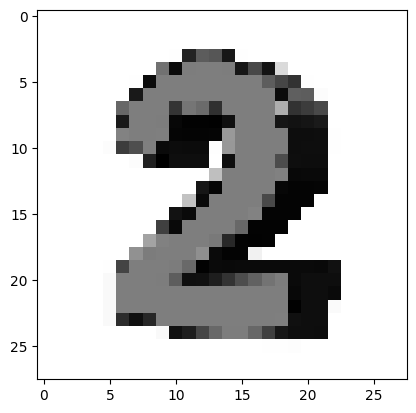

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5


In [82]:
import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_adam.predict(resized_img.reshape(1, 28, 28))))

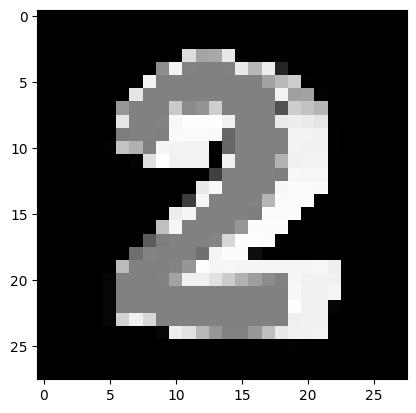

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2


In [90]:
# img = 1. - img

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_adam.predict(img.reshape(1, 28, 28))))

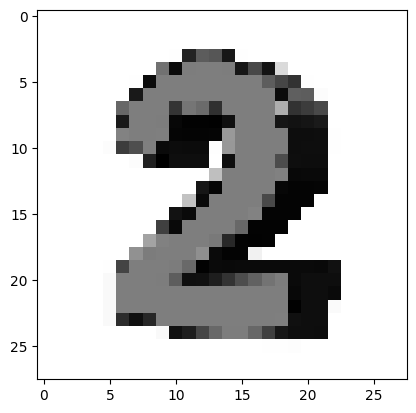

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5


In [84]:
import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img - 1., cmap='gray')
plt.show()

print(np.argmax(model_adam.predict(resized_img.reshape(1, 28, 28))))

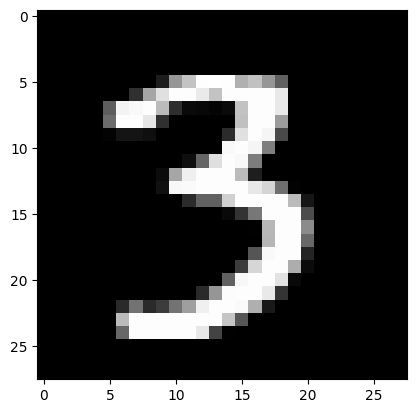

In [76]:
import matplotlib.pyplot as plt

img = X_train[10000]

plt.imshow(img, cmap='gray')
plt.show()

In [78]:
import requests

image_url = "https://wallpapershome.com/images/pages/pic_h/14575.jpg"
filename = "cat.jpg"  # Choose a filename for the downloaded image

# Send a GET request to the image URL
response = requests.get(image_url, stream=True)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Open a file in binary write mode and save the image content
    with open(filename, "wb") as f:
        for chunk in response.iter_content(1024):  # Download in chunks
            f.write(chunk)

    print(f"Image downloaded successfully as {filename}")
else:
    print(f"Error downloading image: Status code {response.status_code}")

Image downloaded successfully as cat.jpg


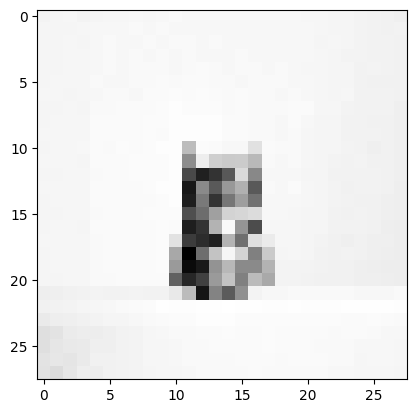

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
5


In [80]:
import cv2

# Load the image
img = cv2.imread('cat.jpg')

resized_img = cv2.resize(img, (28, 28), interpolation=cv2.INTER_LINEAR)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)
resized_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)

resized_img

import matplotlib.pyplot as plt

img = resized_img/255.

plt.imshow(img, cmap='gray')
plt.show()

print(np.argmax(model_adam.predict(resized_img.reshape(1, 28, 28))))

In [ ]:
model_adagrad = tf.keras.models.Sequential([
                                              tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                                              tf.keras.layers.Dense(128, activation='relu'),
                                              tf.keras.layers.Dense(10, activation='softmax')
                                        ])

model_adagrad.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

history_adagrad = model_adagrad.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size = 540)

In [ ]:
model_sgd = tf.keras.models.Sequential([
                                              tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                                              tf.keras.layers.Dense(128, activation='relu'),
                                              tf.keras.layers.Dense(10, activation='softmax')
                                        ])

model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size = 540)

In [3]:
model_sgd = tf.keras.models.Sequential([
                                              tf.keras.layers.Flatten(input_shape=(28, 28, 1)),
                                              tf.keras.layers.Dense(128, activation='relu'),
                                              tf.keras.layers.Dense(10, activation='softmax')
                                        ])

model_sgd.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history_sgd = model_sgd.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size = 540)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7184 - loss: 1.0428 - val_accuracy: 0.9355 - val_loss: 0.2474
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9212 - loss: 0.2858 - val_accuracy: 0.9522 - val_loss: 0.1873
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9416 - loss: 0.2126 - val_accuracy: 0.9588 - val_loss: 0.1587
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9518 - loss: 0.1744 - val_accuracy: 0.9635 - val_loss: 0.1375
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9597 - loss: 0.1455 - val_accuracy: 0.9675 - val_loss: 0.1224
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9646 - loss: 0.1287 - val_accuracy: 0.9688 - val_loss: 0.1139
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9690 - loss: 0.1142 - val_accuracy: 0.9715 - val_loss: 0.1055
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9722 - loss: 0.0998 - val_accuracy: 0

In [36]:
import matplotlib.pyplot as plt

img = x_train[10000]

plt.imshow(img, cmap='gray')
plt.show()

NameError: name 'x_train' is not defined

In [45]:
model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0812 - loss: 2.3729


[2.3614723682403564, 0.08500000089406967]

In [48]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [49]:
X_train.shape

(60000, 28, 28)

In [50]:
X_test.shape

(10000, 28, 28)

In [51]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [52]:
y_train[0]

9

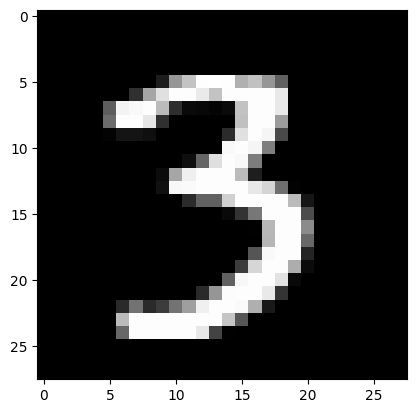

In [21]:
import matplotlib.pyplot as plt

img = x_train[10000]

plt.imshow(img, cmap='gray')
plt.show()

In [22]:
img[5][0]

0